In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
training = pd.read_csv('processedTrain.csv')
testing = pd.read_csv('processedTest.csv')

In [4]:
X_train = training.drop(['prognosis'],axis=1) # the training attributes
y_train = training['prognosis'] # the training labels

X_test = testing.drop(['prognosis'],axis=1) # the testing attributes
y_test = testing['prognosis'] # the testing labels

In [5]:
y_train_enc= pd.get_dummies(y_train)
y_test_enc= pd.get_dummies(y_test)

In [6]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [7]:
model= Sequential()
model.add(Dense(64, activation='relu', input_shape= (X_train.shape[1], )))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train_enc.shape[1], activation='softmax'))

model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
early_stopping_monitor= EarlyStopping(patience=10, monitor='val_accuracy')
history = model.fit(X_train, y_train_enc, batch_size=120, epochs=30, validation_data=(X_test,y_test_enc), callbacks=[early_stopping_monitor])

Epoch 1/30
41/41 [==============================] - 0s 4ms/step - loss: 3.5199 - accuracy: 0.1254 - val_loss: 3.2163 - val_accuracy: 0.2857
Epoch 2/30
41/41 [==============================] - 0s 1ms/step - loss: 2.7345 - accuracy: 0.4431 - val_loss: 2.0068 - val_accuracy: 0.6667
Epoch 3/30
41/41 [==============================] - 0s 2ms/step - loss: 1.3812 - accuracy: 0.7807 - val_loss: 0.7107 - val_accuracy: 0.8810
Epoch 4/30
41/41 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.9415 - val_loss: 0.2068 - val_accuracy: 0.9762
Epoch 5/30
41/41 [==============================] - 0s 1ms/step - loss: 0.1095 - accuracy: 0.9994 - val_loss: 0.0966 - val_accuracy: 0.9762
Epoch 6/30
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 0.9762
Epoch 7/30
41/41 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.0697 - val_accuracy: 0.9762
Epoch 8/30
41/41 [==

In [9]:
model.evaluate(X_test, y_test_enc, batch_size=1, steps=5)

5/5 [==============================] - 0s 751us/step - loss: 0.0011 - accuracy: 1.0000


[0.0011314863804727793, 1.0]

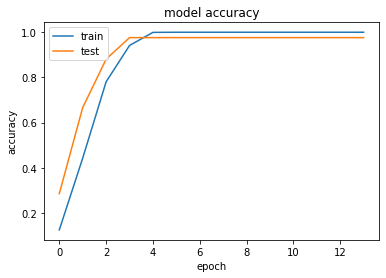

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

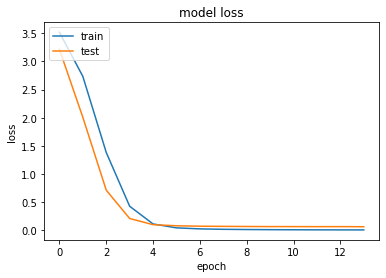

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
predictions = model.predict(X_test)

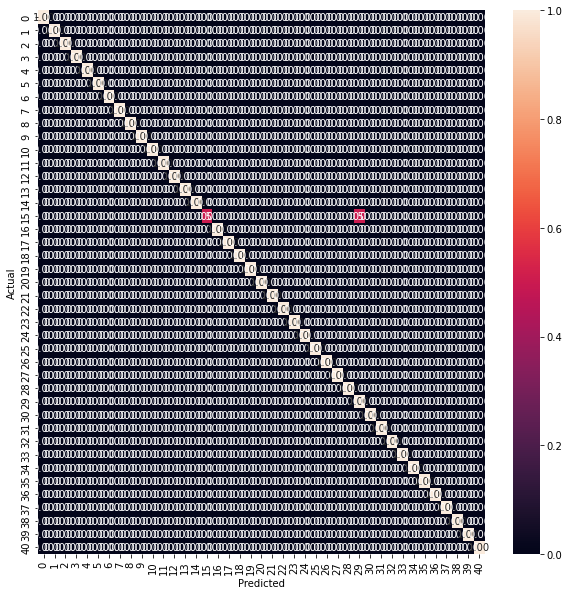

In [21]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test_enc.values.argmax(axis=1), predictions.argmax(axis=1))
cmn = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)